# Predicting coronavirus cases in New York State

Data from: https://github.com/nytimes/covid-19-data

In [121]:
import numpy as np
np.set_printoptions(threshold=np.inf)

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from math import sqrt

## Load csv data

In [122]:
df = pd.read_csv('data/covid-cases-us-states.csv')
df.head(10)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


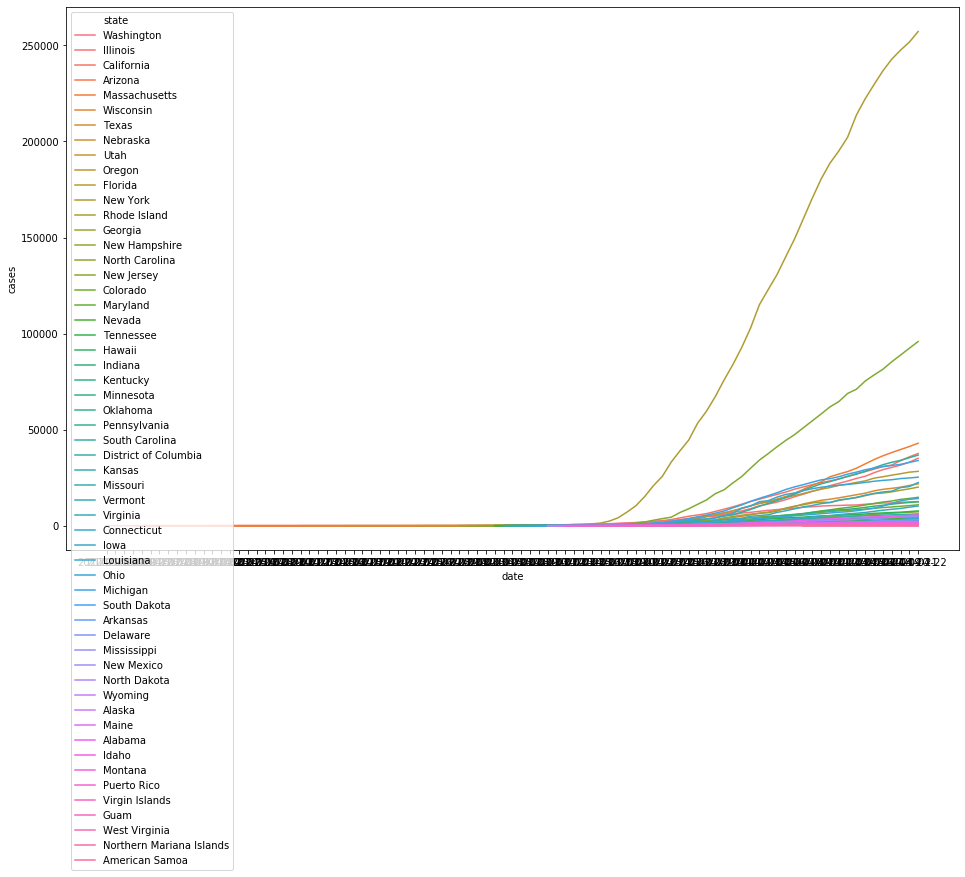

In [123]:
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x='date', y='cases', hue='state')

## Extract one part of data for training

In [124]:
nydf = df[df['state']=='New York']
nydf

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
338,2020-03-06,New York,36,44,0
369,2020-03-07,New York,36,89,0
404,2020-03-08,New York,36,106,0
440,2020-03-09,New York,36,142,0
478,2020-03-10,New York,36,173,0


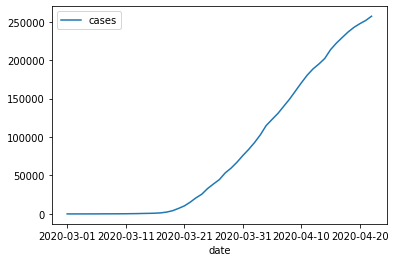

In [125]:
nydf.plot(x='date', y='cases')

In [126]:
y = nydf['cases'].tolist()
y

[1,
 1,
 2,
 11,
 22,
 44,
 89,
 106,
 142,
 173,
 217,
 326,
 421,
 610,
 732,
 950,
 1374,
 2382,
 4152,
 7102,
 10356,
 15168,
 20875,
 25665,
 33066,
 38987,
 44635,
 53363,
 59568,
 67174,
 75832,
 83889,
 92770,
 102870,
 114996,
 122911,
 130703,
 140081,
 149401,
 159937,
 170512,
 180458,
 188694,
 195031,
 202208,
 213779,
 222284,
 229642,
 236763,
 242817,
 247543,
 251720,
 257246]

In [127]:
x = list(range(1, len(y)+1))
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [128]:
len(x), len(y)

(53, 53)

## Make train/test data

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0, shuffle=False)

In [130]:
x_test

array([[48],
       [49],
       [50],
       [51],
       [52],
       [53]])

# Build regression model

1. Linear regression

```
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
```
2. Linear regression with kernel trick

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

```
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
```
3. Ridge regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

```
Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. 
```

## Evaluation metrics:

- RMSE:
- Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [131]:
from sklearn import metrics

In [132]:
?metrics.mean_squared_error

In [133]:
metrics.r2_score?

### 1. Linear regression

In [134]:
def visualize_results(model):
    y_pred = model.predict(x_test)
    print("RMSE: ", sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("R2 score: ", model.score(x_test, y_test))
    #or
    #print("R2 score: ", metrics.r2_score(y_test, y_pred))
    plt.title("Predict the next numbers in a given sequence")
    plt.xlabel('time (date)')
    plt.ylabel('#cases')
    plt.scatter(x_train, y_train, color='blue')
    plt.scatter(x_test, y_test, color='green')
    plt.plot(x, model.predict(x), color='red')
    

In [135]:
# call a model
regsr=LinearRegression()
#train on data
regsr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
# predict on new data
y_pred = regsr.predict(x_test)
y_pred

array([[181548.72340426],
       [186512.12765957],
       [191475.53191489],
       [196438.93617021],
       [201402.34042553],
       [206365.74468085]])

RMSE:  50342.74584640663
R2 score:  -28.99078277377628


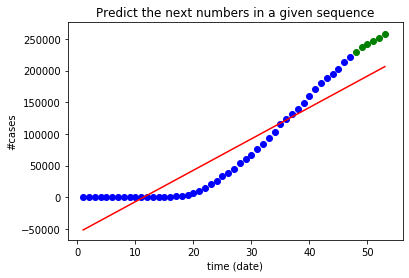

In [137]:
visualize_results(regsr)

### 1.1 Fit using logistic function

In [138]:
#max_y = y.max() + 1
max_y = 400000
y_train_rescaled = y_train / max_y 

y_pred = regsr.predict(x_test)
y_pred

In [139]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(x_train, y_train_rescaled.ravel())

In [140]:
# y_pred = model.predict(x_test)
# y_pred
# visualize_results(model)

In [141]:
y_train_new = -np.log(1 / y_train_rescaled - 1)

In [142]:
model = LinearRegression()  # ax+b 
model.fit(x_train, y_train_new)  # => we obtained a, b

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
def predict(model, x_x):
    # y_y = a * x_x + b
    y_y = model.predict(x_x)
    y_y_logit = 1 / (1 + np.exp(-y_y))
    y_y_final = (y_y_logit * max_y).astype(np.int)
    return y_y_final

In [144]:
y_pred = predict(model, x_test)

In [145]:
y_pred

array([[364650],
       [372397],
       [378547],
       [383387],
       [387172],
       [390117]])

In [146]:
def visualize_results1(model):
    y_pred = predict(model, x_test)
    print("RMSE: ", sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("R2 score: ", model.score(x_test, y_test))
    #or
    #print("R2 score: ", metrics.r2_score(y_test, y_pred))
    plt.title("Predict the next numbers in a given sequence")
    plt.xlabel('time (date)')
    plt.ylabel('#cases')
    plt.scatter(x_train, y_train, color='blue')
    plt.scatter(x_test, y_test, color='green')
    y_y = predict(model, x)
    plt.plot(x, y_y, color='red')
    

RMSE:  135093.74165186187
R2 score:  -706.1700641255255


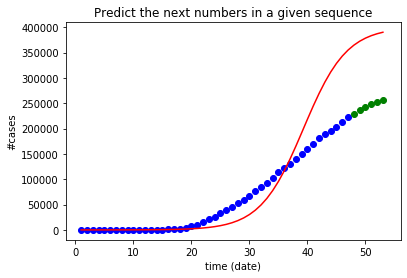

In [147]:
visualize_results1(model)

RMSE:  17562.05389943519
R2 score:  -706.1859447650372


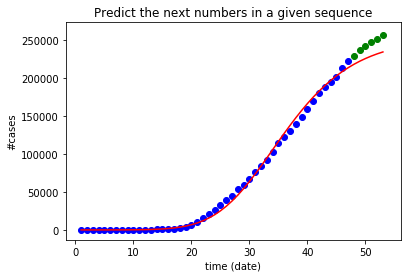

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
reg_poly = make_pipeline(PolynomialFeatures(degree),LinearRegression())
reg_poly.fit(x_train, y_train_new)
visualize_results1(reg_poly)

### 2. Linear regression with kernel trick

RMSE:  30806.876216582004
R2 score:  -10.230764722266873


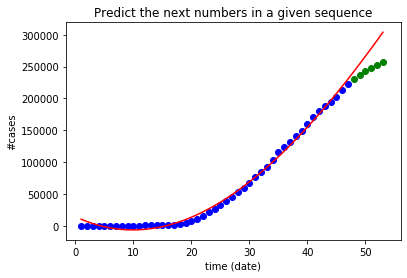

In [149]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
reg_poly = make_pipeline(PolynomialFeatures(degree),LinearRegression())
reg_poly.fit(x_train, y_train)
visualize_results(reg_poly)

RMSE:  5072.092693467051
R2 score:  0.695569356612374


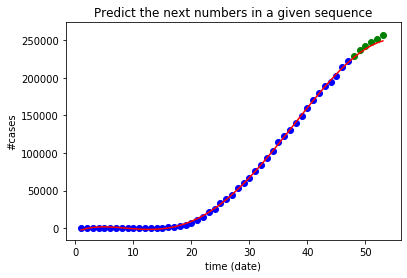

In [150]:
degree = 5 #
reg_poly = make_pipeline(PolynomialFeatures(degree),LinearRegression())
reg_poly.fit(x_train, y_train)
visualize_results(reg_poly)

### 3. Ridge regression with kernel

In [151]:
from sklearn.linear_model import Ridge

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.61651e-18): result may not be accurate.
  overwrite_a=True).T


RMSE:  7038.889227285306
R2 score:  0.413696801645866


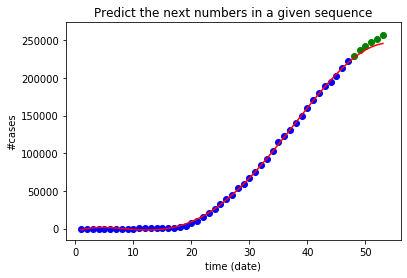

In [152]:
degree=5

ridge_poly = make_pipeline(PolynomialFeatures(degree), Ridge())
ridge_poly.fit(x_train, y_train)
visualize_results(ridge_poly)

In [153]:
pd.DataFrame(
{'gt': y_test.reshape(-1),
 'predicted': ridge_poly.predict(x_test).reshape(-1)
} )

,gt,predicted
0,229642,226573.781545
1,236763,232270.194637
2,242817,237121.681534
3,247543,241041.753346
4,251720,243942.693619
5,257246,245735.693758


In [154]:
ridge_poly.predict(x_test)

array([[226573.78154521],
       [232270.19463717],
       [237121.68153391],
       [241041.75334644],
       [243942.69361854],
       [245735.69375831]])

### Other regression methods

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

RMSE:  1129.9210485997316
R2 score:  0.9848918878556614


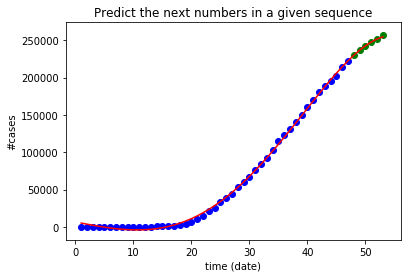

In [155]:
from sklearn.linear_model import LassoLars

degree=5

model = make_pipeline(PolynomialFeatures(degree), LassoLars(alpha=2))
model.fit(x_train, y_train)
visualize_results(model)

In [156]:
#Results
pd.DataFrame(
{'gt': y_test.reshape(-1),
 'predicted': model.predict(x_test)
} )

,gt,predicted
0,229642,229915.366477
1,236763,236652.198005
2,242817,242593.648754
3,247543,247628.605488
4,251720,251640.183229
5,257246,254505.609818


### Be careful with the scale of data


RMSE:  0.2792827008740326
R2 score:  -53.54716569026595


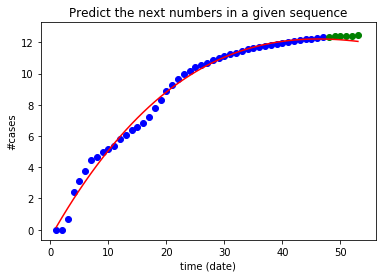

In [157]:
#if we scale the input data by a log function
log_y = np.log(y)
x_train, x_test, y_train, y_test = train_test_split(x, log_y, test_size=0.1, random_state=0, shuffle=False)

degree=3

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(x_train, y_train)
visualize_results(model)   #RMSE descreases

In [158]:
pd.DataFrame(
    { 'gt': np.exp(y_test).reshape(-1),
       'predicted': np.exp(model.predict(x_test)).reshape(-1)
    }
)


,gt,predicted
0,229642.0,198972.755190
1,236763.0,195779.645908
2,242817.0,191403.349118
3,247543.0,185981.781544
4,251720.0,179663.956516
5,257246.0,172604.457873


In [159]:
# The actual rmse
sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(model.predict(x_test))))

59735.0386578049